<a href="https://colab.research.google.com/github/Rishabh672003/Learning-machine-learning/blob/main/Campus-placement-predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Campus Placement Prediction Using Perceptron Machine Learning Algorithm


In [6]:
# !pip install lazypredict

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import lazypredict

scaler = StandardScaler()

In [8]:
url = "https://raw.githubusercontent.com/Rishabh672003/Learning-machine-learning/main/datasets/Placement_Data_Full_Class.csv"
df = pd.read_csv(url)

In [9]:
df.shape

(215, 15)

In [10]:
df.head

<bound method NDFrame.head of      sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
0     Sci&Tech  

In [11]:
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [12]:
# Create an instance of LabelEncoder
le = LabelEncoder()

# List of columns to encode
cols = list(df)

# Apply LabelEncoder to each column in cols
for col in cols:
   df[col] = le.fit_transform(df[col])

df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,1,46,1,93,1,1,14,2,0,9,1,64,1,19
1,1,1,82,0,79,1,2,74,2,1,74,0,153,1,0
2,2,1,42,0,51,0,0,27,0,0,55,0,50,1,12
3,3,1,22,0,14,0,2,3,2,0,37,1,72,0,45
4,4,1,98,0,70,0,1,65,0,0,96,0,28,1,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,210,1,85,1,84,1,1,76,0,0,83,0,199,1,36
211,211,1,25,1,24,1,2,60,2,0,52,0,14,1,20
212,212,1,46,1,49,1,1,64,0,1,25,0,179,1,27
213,213,0,64,1,45,1,1,14,0,0,45,1,81,1,1


In [13]:
X = df.iloc[:, :13]
y = df['status']

In [14]:
class_distribution = df["status"].value_counts()
class_distribution

1    148
0     67
Name: status, dtype: int64

In [15]:
scaler.fit_transform(X)

array([[-1.72401341,  0.73943397, -0.13105552, ..., -1.48896037,
         1.12390297, -0.64919149],
       [-1.70790113,  0.73943397,  1.22686918, ...,  1.01594166,
        -0.88975652,  0.87128332],
       [-1.69178886,  0.73943397, -0.28193605, ...,  0.28373953,
        -0.88975652, -0.8883673 ],
       ...,
       [ 1.69178886,  0.73943397, -0.13105552, ..., -0.8723691 ,
        -0.88975652,  1.31546697],
       [ 1.70790113, -1.35238581,  0.54790683, ..., -0.10163001,
         1.12390297, -0.35876372],
       [ 1.72401341,  0.73943397, -0.50825683, ...,  1.24716339,
         1.12390297, -0.37584771]])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 13), (65, 13), (150,), (65,))

In [18]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:01<00:00, 21.46it/s]

[LightGBM] [Info] Number of positive: 101, number of negative: 49
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 272
[LightGBM] [Info] Number of data points in the train set: 150, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.673333 -> initscore=0.723300
[LightGBM] [Info] Start training from score 0.723300
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

In [ ]:
# Model made
P = Perceptron(max_iter=10000, random_state=42, early_stopping = True)


#model Train
P.fit(X_train,y_train)

Perceptron(early_stopping=True, max_iter=10000, random_state=42)

In [ ]:
print(f"The Accuracy of the model is: {P.score(X_test, y_test)*100}")

The Accuracy of the model is: 86.15384615384616


In [ ]:
P.intercept_, P.coef_[0]

# w1x1 + w2x2 + w3x3 +w4x4 ... + w15x15 = d

(array([-44.]),
 array([-351.,  -17.,  816.,  -18.,  278.,  -23.,  -45.,  186.,   -9.,
          39., -123.,  -45., -353.]))

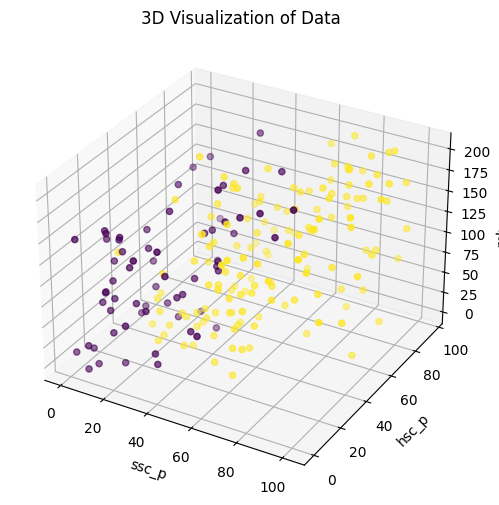

In [ ]:
features_to_visualize = ['ssc_p', 'hsc_p', 'mba_p']

# Separate selected features and target variable
X_3d = df[features_to_visualize]
y = df['status']

# Create a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color-coded target variable values
ax.scatter(X_3d['ssc_p'], X_3d['hsc_p'], X_3d['mba_p'], c=y, cmap='viridis')

# Add labels for axes
ax.set_xlabel('ssc_p')
ax.set_ylabel('hsc_p')
ax.set_zlabel('mba_p')

# Customize plot appearance (optional)
ax.set_title('3D Visualization of Data')

plt.show()

## Comparison of Perceptron with other ML Models


1. Support Vector Machine


In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [ ]:
print(f"The Accuracy of the model is: {clf.score(X_test, y_test)*100}")

The Accuracy of the model is: 81.53846153846153


2. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
print(f"The Accuracy of the model is: {clf.score(X_test, y_test)*100}")

The Accuracy of the model is: 84.61538461538461


3. Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [ ]:
print(f"The Accuracy of the model is: {clf.score(X_test, y_test)*100}")

The Accuracy of the model is: 86.15384615384616


## Result

In this case all the 4 models

- Perceptron
- Support Vector Machines
- Random Forest
- Gradient Boost

Give similar results that is around 80%-90% accuracy.

So, we think the bootleneck here is the small dataset size of only around 200, thats why we are not getting that accurate results

## Campus placement With only 3 Features

In [ ]:
# Load the dataset
url = "https://raw.githubusercontent.com/Rishabh672003/Learning-machine-learning/main/Placement_Data_Full_Class.csv"  # Replace with the actual path to your CSV file
data = pd.read_csv(url)

# Extract relevant features and target variable
X_3d = data[['ssc_p', 'hsc_p', 'degree_p']].values
y_3d = np.where(data['status'] == 'Placed', 1, 0)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_3d, y_3d, test_size=0.2, random_state=42)

In [ ]:
# Define the perceptron function for 3D data
def perceptron_3d(X, y, learning_rate=0.1, epochs=1000):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])

    for _ in range(epochs):
        for i in range(X.shape[0]):
            y_hat = step(np.dot(X[i], weights))
            weights = weights + learning_rate * (y[i] - y_hat) * X[i]

    return weights[0], weights[1:]

# Define the step function for the perceptron
def step(z):
    return 1 if z > 0 else 0

In [ ]:
# Train the perceptron on 3D data
intercept_3d, coef_3d = perceptron_3d(X_train, y_train)

# Calculate predictions on the test set
X_test_bias = np.insert(X_test, 0, 1, axis=1)
predictions = np.dot(X_test_bias, np.concatenate([[intercept_3d], coef_3d]))

# Convert predictions to binary (placed or not placed)
predicted_labels = np.where(predictions > 0, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)

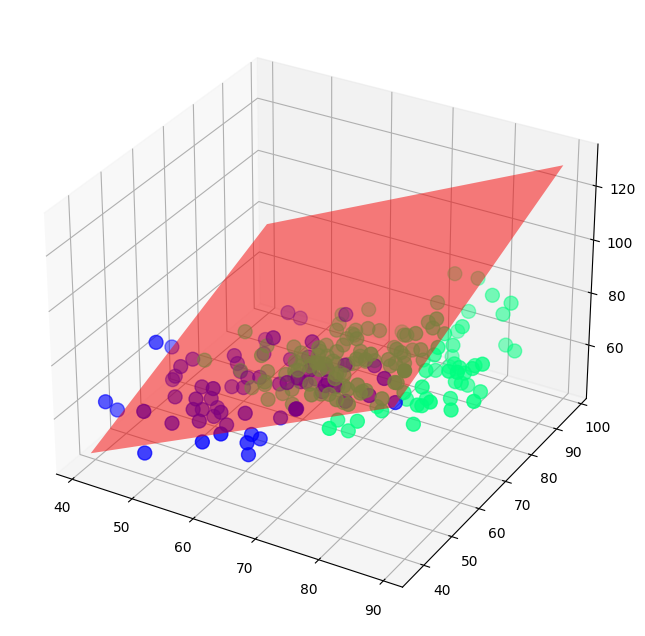

Accuracy of the Model is: 72.09302325581395


In [ ]:
# Visualize the decision boundary in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the decision boundary
x_input = np.linspace(X_3d[:, 0].min(), X_3d[:, 0].max(), 100)
y_input = np.linspace(X_3d[:, 1].min(), X_3d[:, 1].max(), 100)
x_input, y_input = np.meshgrid(x_input, y_input)
z_input = -(intercept_3d + coef_3d[0] * x_input + coef_3d[1] * y_input) / coef_3d[2]

ax.plot_surface(x_input, y_input, z_input, alpha=0.5, rstride=100, cstride=100, color='red')

# Scatter plot of the 3D data points
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y_3d, cmap='winter', s=100)

plt.show()

# Print the accuracy of the model
print("Accuracy of the Model is:", accuracy*100)